In [ ]:
# import splitfolders
import tensorflow as tf
print(tf.test.gpu_device_name())
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

/device:GPU:0
Num GPUs Available:  1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pyunpack

In [ ]:
# from pyunpack import Archive
# Archive('/content/drive/My Drive/mstar.rar').extractall('/content/drive/My Drive/mstar')

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
train = r"/content/drive/MyDrive/PFE ENSTA BRETAGNE/mstar/TRAIN" #/content/drive/MyDrive/mstar
test = r"/content/drive/MyDrive/PFE ENSTA BRETAGNE/mstar/TEST"
# val = r"dataset/val"

In [ ]:
cat_counts = {}
for cat in os.listdir(train):
    counts = len(os.listdir(os.path.join(train, cat)))
    cat_counts[cat] =counts
print(cat_counts)

{'classe3': 298, 'classe9': 299, 'classe10': 299, 'classe5': 233, 'classe2': 233, 'classe7': 299, 'classe8': 232, 'classe1': 292, 'classe4': 256, 'classe6': 299}


In [ ]:
cat_counts = {}
for cat in os.listdir(test):
    counts = len(os.listdir(os.path.join(test, cat)))
    cat_counts[cat] =counts
print(cat_counts)

{'classe8': 196, 'classe7': 273, 'classe3': 274, 'classe6': 274, 'classe9': 274, 'classe1': 274, 'classe2': 195, 'classe4': 195, 'classe5': 196, 'classe10': 274}


In [ ]:
# dataset=[]
# count=0
# for file in os.listdir(train):
#     path=os.path.join(train,file)
#     for im in os.listdir(path):
#         image=load_img(os.path.join(path,im),color_mode = "grayscale",target_size=(128,128))
#         image=img_to_array(image)
#         image=image/255.0
#         dataset.append([image,count])
#     count=count+1

In [ ]:
PATH1=r'/content/drive/MyDrive/dataset.pt'
PATH2='/content/drive/MyDrive/datatest.pt'

In [ ]:
import torch
dataset=torch.load(PATH1)
datatest=torch.load(PATH2)

In [ ]:
x_train,y_train=zip(*dataset)

In [ ]:
# datatest=[]
# count=0
# for file in os.listdir(test):
#     path=os.path.join(test,file)
#     for im in os.listdir(path):
#         image=load_img(os.path.join(path,im),color_mode = "grayscale",target_size=(128,128))
#         image=img_to_array(image)
#         image=image/255.0
#         dataset.append([image,count])
#     count=count+1

In [ ]:
x_test,y_test=zip(*dataset)

In [ ]:
# x_train = x_train.reshape(x_train.shape[0], 128, 128, 1).astype('float32')
# x_train = (x_train - 127.5) / 127.5 # Normalize the images to [-1, 1]
# print(type(x_train))

In [ ]:
y_train=to_categorical(y_train)
x_train=np.array(x_train)

y_test=to_categorical(y_test)
x_test=np.array(x_test)

In [ ]:
x_train.shape



(2740, 128, 128, 1)

In [ ]:
x_test.shape

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

In [ ]:
y_train.shape

In [ ]:
train_images= x_train

In [ ]:
train_images.shape

(2740, 128, 128, 1)

In [ ]:
 BUFFER_SIZE = 60000
 BATCH_SIZE = 32

In [ ]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
print(type(train_dataset))

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


In [ ]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display
from keras.layers import Input, Reshape, Dropout, Dense, Flatten, BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model, load_model
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
import numpy as np
from PIL import Image
import os

In [ ]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(8*8*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((8, 8, 256)))
    assert model.output_shape == (None, 8, 8, 256) # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 8, 8, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())



    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 16, 16, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 32, 32, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 64, 64, 32)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    #assert model.output_shape == (None, 128, 128)
  
    return model



tf.Tensor(
[[-2.7702810e-05  6.9479371e-05  1.7684579e-04 ... -4.2795192e-04
  -4.6425578e-04 -3.7298864e-04]
 [-9.5701384e-05  6.6355447e-04  1.6697292e-04 ... -2.6361702e-04
   3.4394339e-05 -1.2218626e-04]
 [ 1.7305295e-04 -4.9922080e-04  3.1561428e-04 ...  5.7198347e-05
   2.1512386e-04 -1.6116982e-04]
 ...
 [-1.7824977e-04 -8.5996831e-04 -5.6183554e-04 ... -1.3032546e-03
   8.6177737e-05 -2.3315556e-03]
 [ 2.1698435e-04  1.1101147e-05 -8.9836918e-04 ...  1.9645393e-03
   3.4187967e-04 -5.6407123e-04]
 [ 1.2519868e-04 -3.5687088e-05  1.8998973e-04 ... -1.3450485e-03
  -6.7204481e-04 -4.1247626e-05]], shape=(128, 128), dtype=float32)


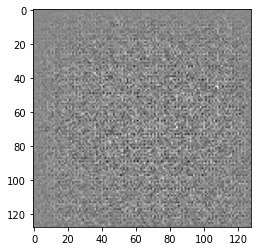

In [ ]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)
print(generated_image[0, :, :, 0])
plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [ ]:
# from keras.utils.vis_utils import plot_model
# plot_model(generator, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
generator.summary()

In [ ]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(1, 1), padding='same',
                                      input_shape=(128, 128,1)))
                            
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [ ]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[-0.00067587]], shape=(1, 1), dtype=float32)


In [ ]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1664      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 128, 128, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 128)       204928    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 64, 64, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 524288)           

In [ ]:

# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
import os

checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [ ]:
EPOCHS = 500
# We will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
num_examples_to_generate = 16
noise_dim = 100
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [ ]:
# tf.function annotation causes the function 
# to be "compiled" as part of the training
@tf.function
def train_step(images):
  
    # 1 - Create a random noise to feed it into the model
    # for the image generation
    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    
    # 2 - Generate images and calculate loss values
    # GradientTape method records operations for automatic differentiation.
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    # 3 - Calculate gradients using loss values and model variables
    # "gradient" method computes the gradient using 
    # operations recorded in context of this tape (gen_tape and disc_tape).
    
    # It accepts a target (e.g., gen_loss) variable and 
    # a source variable (e.g.,generator.trainable_variables)
    # target --> a list or nested structure of Tensors or Variables to be differentiated.
    # source --> a list or nested structure of Tensors or Variables.
    # target will be differentiated against elements in sources.

    # "gradient" method returns a list or nested structure of Tensors  
    # (or IndexedSlices, or None), one for each element in sources. 
    # Returned structure is the same as the structure of sources.
    gradients_of_generator = gen_tape.gradient(gen_loss, 
                                               generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, 
                                                discriminator.trainable_variables)
    
    # 4 - Process  Gradients and Run the Optimizer
    # "apply_gradients" method processes aggregated gradients. 
    # ex: optimizer.apply_gradients(zip(grads, vars))
    """
    Example use of apply_gradients:
    grads = tape.gradient(loss, vars)
    grads = tf.distribute.get_replica_context().all_reduce('sum', grads)
    # Processing aggregated gradients.
    optimizer.apply_gradients(zip(grads, vars), experimental_aggregate_gradients=False)
    """
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))


In [ ]:
import time
from IPython import display # A command shell for interactive computing in Python.

def train(dataset, epochs):
  # A. For each epoch, do the following:
  for epoch in range(epochs):
    start = time.time()
    # 1 - For each batch of the epoch, 
    for image_batch in dataset:
      # 1.a - run the custom "train_step" function
      # we just declared above
      train_step(image_batch)

    # 2 - Produce images for the GIF as we go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # 3 - Save the model every 5 epochs as 
    # a checkpoint, which we will use later
    if (epoch + 1) % 5 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    # 4 - Print out the completed epoch no. and the time spent
    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # B. Generate a final image after the training is completed
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

In [ ]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  # 1 - Generate images
  predictions = model(test_input, training=False)
  # 2 - Plot the generated images
  fig = plt.figure(figsize=(12,12))
  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')
  # 3 - Save the generated images
  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

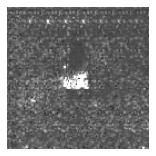

In [ ]:
train(train_dataset, EPOCHS)
